# **Instalando bibliotecas**

In [ ]:
pip install tensorflow matplotlib numpy sklearn seaborn pandas scikit-learn

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, datasets

In [3]:
print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.12.0
GPU is NOT AVAILABLE


# **Importando dataset**

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


# **Criando o modelo**

In [19]:
model = tf.keras.models.Sequential()

# Adding convolutional and pooling layers
model.add(layers.Conv2D(28, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Adicionando as camadas densas:

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Resumo do modelo criado:

In [21]:
model.summary()
model.losses

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        56        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        16192     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

[]

**Pesos iniciais:**

In [22]:
print(model.get_weights())

[array([[[[ 0.35131145, -0.2922563 , -0.17656365, -0.22177187,
          -0.18147922,  0.02012771, -0.4431632 ,  0.07921863,
           0.10028511,  0.44003624, -0.37166062, -0.0873656 ,
           0.11487824, -0.17686132,  0.11746359, -0.22832605,
           0.02638954, -0.4073278 ,  0.18570656, -0.12262839,
          -0.3768716 , -0.34491104, -0.10038075,  0.03517461,
          -0.19721225,  0.37995195, -0.31649882,  0.08668458]]]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[[[-0.00290605, -0.06007849,  0.02961135, ..., -0.08489388,
           0.00225441,  0.02536664],
         [ 0.03241928, -0.02583882, -0.01465159, ...,  0.00538906,
           0.03923939, -0.0709192 ],
         [-0.08239125, -0.06405375, -0.01374911, ..., -0.07408845,
          -0.01520345, -0.0709122 ],
         ...,
         [ 0.03272532,  0.02992198, -0.04972606, ..., -0.00381459,
   

# **Compilando o modelo e Iniciando o treinamento**

In [23]:
# Utilizing the "adam" algorithm as optimizer and collecting loss and accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Receiving all the training info into history variable and training for 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1800 - accuracy: 0.9444 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0581 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0500 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0391 - accuracy: 0.9869 - val_loss: 0.0474 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0386 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0253 - accuracy: 0.9912 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0464 -

**Pesos Finais**

In [24]:
print(model.get_weights())

[array([[[[ 0.35594192, -0.2922563 , -0.17656365, -0.22177187,
          -0.18147922,  0.4290455 , -0.4431632 ,  0.1257055 ,
           0.41508   ,  0.5394967 , -0.37166062, -0.0873656 ,
           0.21912652, -0.17686132,  0.1848986 , -0.22832605,
           0.39288494, -0.4073278 ,  0.2218933 , -0.12262839,
          -0.3768716 , -0.34491104, -0.10038075,  0.36654043,
          -0.19721225,  0.4566864 , -0.31649882,  0.24466462]]]],
      dtype=float32), array([ 0.00672317,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.30092654,  0.        , -0.12918733, -0.29480532,  0.00408709,
        0.        ,  0.        , -0.00274718,  0.        ,  0.00821827,
        0.        , -0.27720964,  0.        ,  0.00618732,  0.        ,
        0.        ,  0.        ,  0.        , -0.26028568,  0.        ,
       -0.00304115,  0.        , -0.17917961], dtype=float32), array([[[[ 0.10513996, -0.06358573, -0.14277335, ...,  0.07577085,
           0.10021031,  0.02352978],
         [ 0

# **Criando os gráficos de Erro e Acurácia durante o Treinamento e Validação**

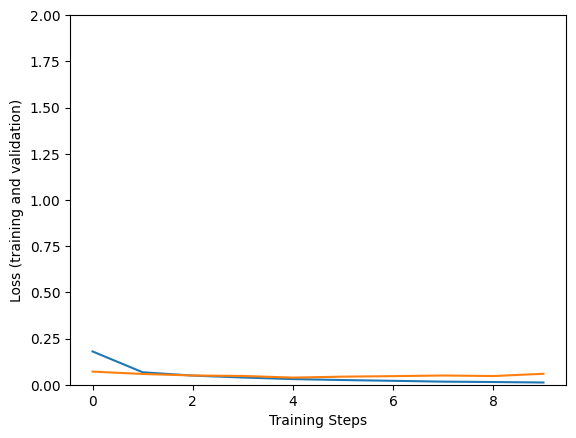

In [25]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


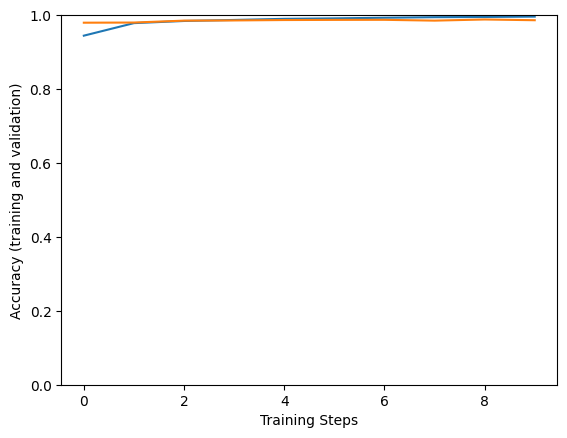

In [26]:
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

Avaliando o Classificador:

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0593 - accuracy: 0.9862 - 1s/epoch - 5ms/step
0.9861999750137329


# **Testando o classificador para um dos dados de Teste**

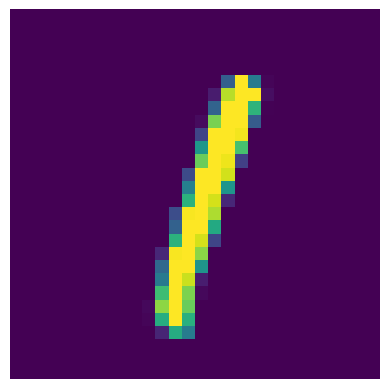

1/1 [==============================] - 0s 72ms/step
True label: 1
Predicted label: 1


In [28]:
classNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

x,y = (test_images[5], test_labels[5])
plt.imshow(x)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(x, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + classNames[int(y)])
print("Predicted label: " + classNames[predicted_index])

# **Matriz de Confusão**

In [29]:
# Fazendo predição com os dados de teste
y_prediction = model.predict(test_images)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=test_labels

# Criando a matriz de confusão
result = confusion_matrix(y_test, y_prediction , normalize='pred')

313/313 [==============================] - 2s 5ms/step


Imprimindo a matriz

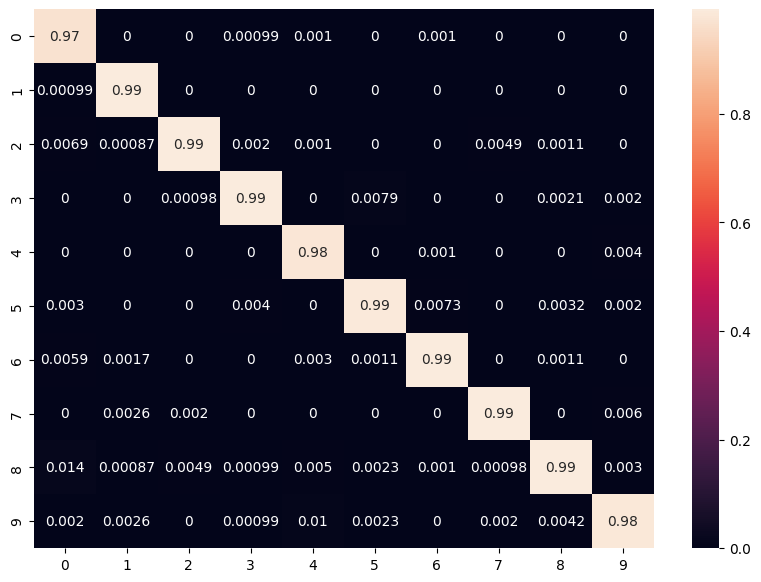

In [30]:
df_cm = pd.DataFrame(result, index = classNames, columns = classNames)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()